In [1]:
from netCDF4 import Dataset, MFDataset, num2date
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from matplotlib import cm
import cartopy.crs as ccrs
from cmocean import cm as cmo
import datetime
import sys
import os
from cartopy.util import add_cyclic_point

data_dir = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_20'

In [2]:
from dask_gateway import Gateway
gateway = Gateway()

In [3]:
gateway.list_clusters()

[]

In [4]:
from dask.distributed import Client, progress
client = Client(n_workers=2, threads_per_worker=2, memory_limit='10GB')
client

Client Scheduler: tcp://127.0.0.1:42075 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 2.68 GB


In [5]:
def lon_convert(lon):
    if lon >= 0:
        return 6*lon
    if lon < 0:
        return 6*(360+lon)
    
def lat_convert(lat):
    return 6*((90-10)+lat)

In [30]:
start_date = datetime.date(2010, 1, 1)
time_delta = datetime.timedelta(5)
#cmap.set_under("black")
#cmap.set_over("DarkViolet")
nf = 0
fig = plt.figure(figsize=(13,6.2))
levels = np.linspace(-0.4, 0.5, 40)
ssh = 366*[0]
dates = 366*[None]

for i in range(0, 366): #change to 366 for the full 5 years
    strtemp = data_dir+start_date.strftime("%y")+start_date.strftime("%m")+start_date.strftime("%d")+'12.nc'
    print(strtemp)
    dataset = Dataset(strtemp)
    # set dimensions
    lon = -129.1 # longtitudes west of the meridian, including 180, are negative.
    lat = 47.95
    # lookup a variable
    # data = dataset.variables['SLA'][0,:,:] #between 30N and 60N, between 180W and 120W
    # data = dataset.variables['SLA'][0,round(lon_convert(lon)),round(lat_convert(lat))] #between 30N and 60N, between 180W and 120W
    data = dataset.variables['SLA'][0, round(lon_convert(lon))-1:round(lon_convert(lon))+2, round(lat_convert(lat))-1:round(lat_convert(lat))+2] #between 30N and 60N, between 180W and 120W
    data = np.transpose(data)
    ssh[i] = sum(sum(data))/9
    dates[i] = start_date
    
    start_date += time_delta

https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010010112.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010010612.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010011112.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010011612.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010012112.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010012612.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010013112.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010020512.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/merged_alt/L4/cdr_grid/ssh_grids_v1812_2010021012.nc
https://podaac-opendap.jpl.nasa.gov/opendap/allData/mer

<Figure size 936x446.4 with 0 Axes>

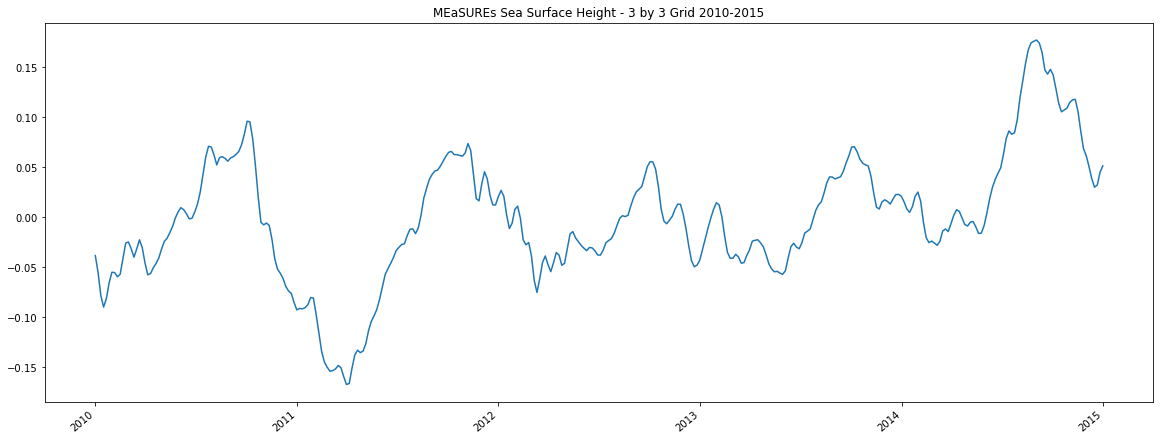

In [31]:
y=ssh
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(16, 6))
ax.plot(dates, y)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
ax.set_title('MEaSUREs Sea Surface Height - 3 by 3 Grid 2010-2015')
plt.show()

In [1]:
fig.savefig('./ssh3total')

NameError: name 'fig' is not defined

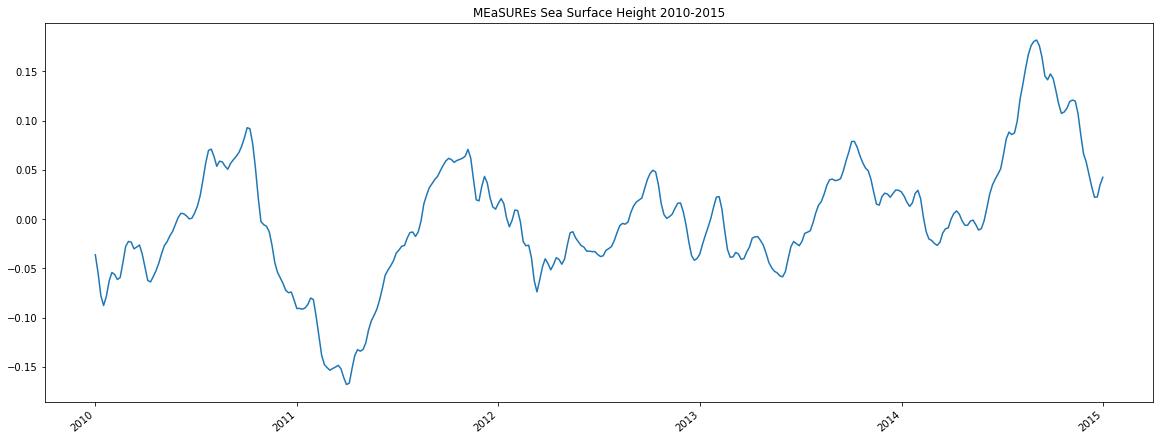

In [8]:
y=ssh
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(16, 6))
ax.plot(dates, y)
# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
ax.set_title('MEaSUREs Sea Surface Height - Single Value 2010-2015')
plt.show()

In [9]:
fig.savefig('./sshtotal')

In [2]:
Client.close(client)

NameError: name 'Client' is not defined

In [3]:
for cluster in gateway.list_clusters():
    print('Stopping %s' % cluster.name)
    gateway.stop_cluster(cluster.name)

NameError: name 'gateway' is not defined

In [4]:
gateway.list_clusters()

NameError: name 'gateway' is not defined

In [5]:
client

NameError: name 'client' is not defined

In [14]:
np.savetxt("ssh.csv", ssh, delimiter=",")

In [17]:
round(lon_convert(lon))

1385